# Preface

On a lark in October 2023, I decided I wanted to review the textbook *Groundwater* by Freeze and Cherry, originally published in 1979. At the same time, I wanted to brush up on some python programming and practical hydrological modelling skills.

This series of notebooks is to be my attempt to progress through the text and try to replicate the lessons and equations using standard python libraries (Scipy, Numpy, Pandas, MatPlotLib, etc.)

For those who would like to follow along with the original text or point out my mistakes, a full archival version of the textbook is available [here](https://archive.org/details/groundwater-freeze-and-cherry-1979/page/8/mode/1up).

# Concepts and Terminology

## Traversing Dimensions

The rate of movement of water in soil can range from mere inches within the span of a decade to tens of meters in a matter of seconds depending on the physical properties of the porous medium. Restricting ourselves to operating in SI units often produces unintuitive results that are difficult to interpret. For this reason, we often abstract our standard equations and parameters by defining only their *dimensions* rather than a specific unit.

$[L]$ = Length (e.g. cm, m, ft, yds, etc.)

$[T]$ = Time (e.g. s, min, hr, yr, Ka, Ma, etc.)

$[M]$ = Mass (e.g. kg, lb, oz etc.)

From these basic dimensions we can extrapalate out include a variety of other common properties. Note that dimensions are expressed inside square brackets to differentiate them from units.

$[L^2]$ = Area (m<sup>2</sup>, hec, mi<sup>2</sup>)

$[L^3]$ = Volume (l, G, m<sup>3</sup>)

$[\frac{L^3}{T}]$ = Volumetric Flux (l/s, ft<sup>3</sup>/min)

$[\frac{L}{T}]$ = Velocity (m/s, cm/yr, km/Ma)

$[\frac{L}{T^2}]$ = Acceleration (m/s<sup>2</sup>)

$[\frac{M*L}{T^2}]$ = Force (N, lbf)

$[\frac{M}{L*T^2}]$ = Pressure (Pa, psi)

When using an equation expressed in dimensions practically, we will convert every instance of $[L]$ and $[T]$ to their representative units. One must be aware that some constants are commonly expressed in SI units but conversions are available in many texts including [Freeze and Cherry](https://ia802904.us.archive.org/BookReader/BookReaderImages.php?zip=/8/items/groundwater-freeze-and-cherry-1979/Freeze_and_Cherry_1979_jp2.zip&file=Freeze_and_Cherry_1979_jp2/Freeze_and_Cherry_1979_0622.jp2&id=groundwater-freeze-and-cherry-1979&scale=4&rotate=0).

## Be Specific

An aquifer is a nebulous concept in that, with few examples (I'm looking at you, Borden), we rarely have homogeneous saturated sand layers that extends arbitrarily to work with. To conceptualize the physical properties of porous media in a complex environment, we must break our dimensional lengths, areas, and volumes down in manageable chunks of known measurements. 
We denote to these measured "chunks" with the preface *specific*. For example, the textbook definition of *Specific Storage* is:

>  ... the volume of water that a unit volume of aquifer releases from storage under a unit decline in hydraulic head.

Note the use of the word "unit", we are definining a property for known quantity of material that allows us to generalize to other similar material. Using SI units, you could express storage as the volume of water released from $1 \, m^3$ of aquifer material when the hydraulic head is decreased by $1 \, m$.


# Chapter 2 Physical Properties and Principles

## 2.1 Darcy's Law

![A diagram of the Darcy Experimental Apparatus](https://ia802904.us.archive.org/BookReader/BookReaderImages.php?zip=/8/items/groundwater-freeze-and-cherry-1979/Freeze_and_Cherry_1979_jp2.zip&file=Freeze_and_Cherry_1979_jp2/Freeze_and_Cherry_1979_0032.jp2&id=groundwater-freeze-and-cherry-1979&scale=2&rotate=0 "Darcy's Experimental Apparatus")

Darcy's Law is the foundational equation in estimating the flow of water through a porous material. To oversimplify, it allows us to determine the quantity of water flowing through volume of porous material. From the example text above we can see the experimental apparatus used to test this principle. If the inflow and outflow into the cylinder are equal ($Q_\text{in} = Q_\text{out}$) and we know the cross-sectional area ($A$) of the cylinder, the measured volume of water collected over a time interval would tell us the velocity of groundwater moving through the cylinder otherwise known as the *specific discharge*.

$$
\text{Specific Velocity} (v) = \frac{\text{Discharge} (Q)}{\text{Area} (A)} 
\quad \text{or} \quad 
v = \frac{Q}{A}
$$

Note that the dimensions of specific discharge, $[L/T]$, are the result of dividing a volumetric flowrate (flux) by a specific area. This is the same dimensionality as a linear velocity, however the specific discharge *is not* a measure of velocity, but instead an approximation of bulk flow through on a macroscopic scale.

## 2.2 Hydraulic Head

This is all well and good. But a basic relationship that relies on a benchtop apparatus does not make it easy to unlock secrets beneath the earth. Not only is it not practicaly to dig up soil everytime you want to know it's specific velocity, the very act of digging it up disturbs its grain structure, resulting in parameter estimations that are not representative.

If only there were a way to measure a property of the saturated material *in-situ* that was proportional to our value $Q$. Thanks to Darcy, we are in luck!

By placing two vertical pipes at the top and bottom of the tilted apparatus, Darcy observed that water from inside the cylinder was being forced up into the pipes, much like how the water level in a straw is slightly above the water level in the glass. 

This phenomena of water rising up into the pipes is a result of its incompressibility. The weight of the porous media and the water itself exerts a pressure on the cylinder. The pipe allows the water to relieve pressure by providing space to move upward until it meets an equal downward force exerted by the atmosphere. We call the height of the water above our common point or *datum* the *hydraulic head* ($h$) or *head* for short.

When Darcy measured the hydraulic head in his apparatus he observed that:

1. the $h$ of the two pipes were not equal; the greater $h$ was always at the inflow and the lesser $h$ was always at the outflow,
2. the $h$ were constant when the rate of water flowing through the cyliner was constant,
3. the $h$ were proportional to the rate of water flowing through the cylinder when the distance between the pipes was held constant, and
4. the $h$ were inversely proportional to the horizontal distance between the pipes when the water flowing through cylinder was held constant.

From our first observation we can surmise that the greater $h$ indicates where the water comes from and the lesser $h$ indicates where the water flows to. Put another way, water will flow from high hydraulic head towards low hydraulic head. We'll refer to the "from" pipe as number 1 and the "to" pipe as number 2. 

Since we know that when $h_1$ and $h_2$ separated by a constant linear distance between points $l_1$ and $l_2$ they are proportional to the flux $Q$, We can then also that our specific discharge $v$ is proportional to $h_1$ and $h_2$. 

The $h$ are measured from the same datum so we can instead use the difference in $h$ and distances to incorporate both measurements into the relationship such that, $\Delta h = h_2 - h_1$ and $\Delta l = l_2 - l_1$. The change in $h$ over the change in $l$ is called the *hydraulic gradient*, represented as $\frac{\Delta h}{\Delta l}$ or $\frac{dh}{dl}$.

All this is to say that the volumetric flow is proportional to the specific velocity which is proportional to the vertical change in head over the horizontal change in distance or:
$$ Q \propto v \propto -\frac{\Delta h}{\Delta l}$$

## 2.3 Hydraulic Conductivity and Permiability

If we measure the hydraulic heads with the cylinder filled with sand and then measure again with the cylinder is full of silt, while leaving the rest of the apparatus unchanged, our measurements of $Q$, $v$, and $h$ between the soils will be different but the proportionality of our observations will remain. 

So it must be a constant property of the water filled soil that scales the proportionality of our velocity-head relationaship i.e. the soil type affects the way water can flow through the system. We will call this soil proportionality constant *Hydraulic Conductivity* or $K$ $[\frac{L}{T}]$. The product of $K$ and the hydraulic gradient are now equal to the specific discharge $v$.

$$v = -K\frac{\Delta h}{\Delta l} $$

If we want to discuss this property of the soil independant of the fluid we use the *intrinsic* or *specific permeability* $k$ $[L^2]$. To incorporate $k$ into the Darcy flux, we need to include parameters of the physical system and the fluid in question. Namely, the dynamic viscosity $\mu$, the fluid density $\rho$, and the gravitational acceleration $g$.

$$K = \frac{k \rho g}{\mu} \quad thus \quad v = \frac{-k \rho g}{\mu} \frac{\Delta h}{\Delta l}$$

In [64]:
import numpy as np
import matplotlib.pyplot as plt

def darcyFlux(K,h1,h2,dl):
    v = -K*(h2-h1)/dl
    return v

flux = darcyFlux(K=0.001,h1=10,h2=5,dl=20)

print(f"The specific discharge is {flux} m/s")

The specific discharge is 0.00025 m/s


In [65]:
# range of K in (m/s) from clay to gravel
KRange = np.logspace(-13,1,num=14)
KRange

array([1.00000000e-13, 1.19377664e-12, 1.42510267e-11, 1.70125428e-10,
       2.03091762e-09, 2.42446202e-08, 2.89426612e-07, 3.45510729e-06,
       4.12462638e-05, 4.92388263e-04, 5.87801607e-03, 7.01703829e-02,
       8.37677640e-01, 1.00000000e+01])

In [66]:
fluxRange = darcyFlux(KRange, 10,5,100)
fluxRange

array([5.00000000e-15, 5.96888321e-14, 7.12551335e-13, 8.50627140e-12,
       1.01545881e-10, 1.21223101e-09, 1.44713306e-08, 1.72755365e-07,
       2.06231319e-06, 2.46194132e-05, 2.93900804e-04, 3.50851914e-03,
       4.18838820e-02, 5.00000000e-01])

Text(0, 0.5, 'Log of Specific Discharge (m/s)')

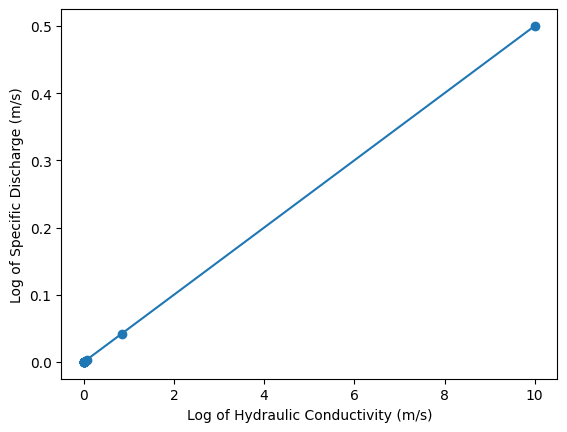

In [67]:
fig, ax = plt.subplots()
ax.plot(KRange,fluxRange,"o-")
ax.set_xlabel("Hydraulic Conductivity (m/s)")
ax.set_ylabel("Specific Discharge (m/s)")

[]

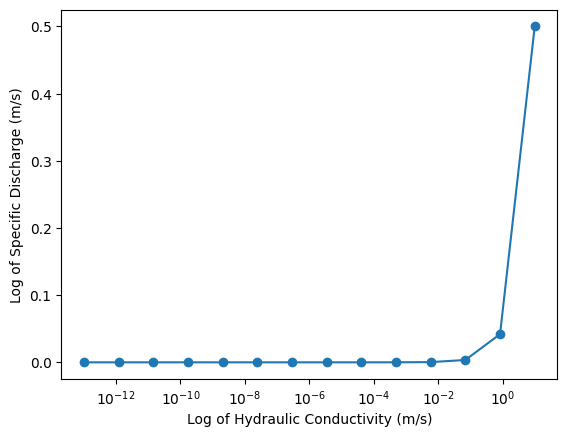

In [68]:
fig, ax = plt.subplots()
ax.plot(KRange,fluxRange,"o-")
ax.set_xlabel("Log of Hydraulic Conductivity (m/s)")
ax.set_ylabel("Specific Discharge (m/s)")
ax.semilogx()

[]

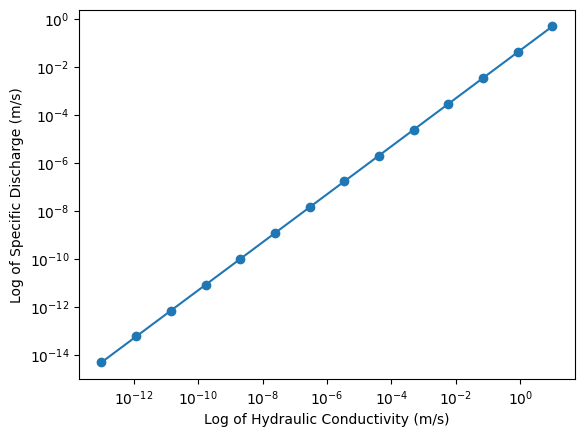

In [69]:
fig, ax = plt.subplots()
ax.plot(KRange,fluxRange,"o-")
ax.set_xlabel("Log of Hydraulic Conductivity (m/s)")
ax.set_ylabel("Log of Specific Discharge (m/s)")
ax.loglog()